Задание на повторение:  
Задание не обязательно к выполнению, но очень рекомендуется для понимания набора данных и получения гипотез для проведения валидации.  
Задание 1: Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.  
Задание 2: построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.  
Задание 3: построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.  
Задание 4: построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.  

Основное задание:  
Даны выборки для обучения и для тестирования. Задание заключается в том, чтобы попробовать разные способы валидации, проанализировать плюсы / минусы каждой и сделать выводы о том, какой способ валидации наиболее устойчивый в данной задаче. Метрика качества для оценки прогнозов - ROC-AUC, название целевой переменной - IsFraud. Рекомендуется использовать модели градиетного бустинга, реализация любая.  

Задание 1: сделать Hold-Out валидацию с разбиением, размер которого будет адеквтаным, по вашему мнению; разбиение проводить по id-транзакции (TransactionID), обучать модель градиетного бустинга любой реализации с подбором числа деревьев по early_stopping критерию до достижения сходимости. Оценить качество модели на тестовой выборке, оценить расхождение по сравнению с качеством на обучающей выборке и тестовой выборке.  

Задание 2: сделать Hold-Out валидацию с разбиением на 3 выборки, разбиение проводить по id-транзакции (TransactionID), размер каждой выборки подобрать самостоятельно. Повторить процедуру из п.1.  

Задание 3: построить доверительный интервал на данных из п.2 на основе бутстреп выборок, оценить качество модели на тестовом выборке относительно полученного доверительного интервала. Сделать выводы.  

Задание 4: выполнить Adversarial Validation на основе данных из обучения / теста, подобрать объема из обучающей выборки, которые сильно похожи на объекты из тестовой выборки, и использовать их в качестве валидационного набора. Сделать выводы о полученных результатах.  

Задание 5: сделать KFold / StratifiedKFold валидацию (на ваше усмотрение), оценить получаемые качество и разброс по метрике качества. Сделать выводы об устойчивости кросс-валидации, сходимости оценки на кросс-валидации и отложенном наборе данных;  

Задание 6 * (опциональное): сделать Hold-Out валидацию по времени (TransactionDT), повторить процедуры из п.1 / п.2 (на ваш выбор). Построить доверительный интервал, сравнить качество на тестовой выборке с полученным доверительным интервалом. Сделать выводы.  

Задание 7 ** (совсем опциональное): в данном наборе данных у нас есть ID-транзакции (TransactionID) и время транзакции (TransactionDT), но отсутствует ID-клиента, который совершал транзакции. Кажется, что в этой задаче валидация по клиенту работала бы хорошо. Предложить критерий, по которому можно выделить клиентов и сделать п.5, используя созданное определение клиента, используя валидацию по клиенту (GroupKFold).  
  

In [108]:
import pandas as pd
import numpy as np

from typing import List, Optional, Tuple
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GroupKFold

import catboost

In [2]:
train = pd.read_csv('assignment2_data/assignment_train.csv')
test = pd.read_csv('assignment2_data/assignment_test.csv')

Задание 1: Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.

In [3]:
train.head(2)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
test.head(2)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3062000,0,1643492,41.0,W,9500,321.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3062001,1,1643513,161.0,W,6668,390.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


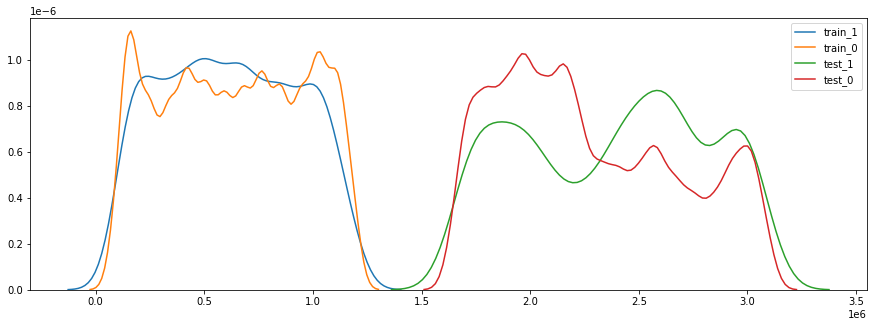

In [5]:
fig, axes = plt.subplots(figsize=(15, 5))

sns.kdeplot(train[train['isFraud'] == 1]['TransactionDT'].values, label="train_1")
sns.kdeplot(train[train['isFraud'] == 0]['TransactionDT'].values, label="train_0")
sns.kdeplot(test[test['isFraud'] == 1]['TransactionDT'].values, label="test_1")
sns.kdeplot(test[test['isFraud'] == 0]['TransactionDT'].values, label="test_0");

__Выводы__  
Данные имеют временную структуру, подойдут следующие виды валидаций: Hold-Out, TimeSeriesSplit и, возможно, Adversarial validation, так как распределения не совпадают.

Задание 2:   
построить `scatter-plot` зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.

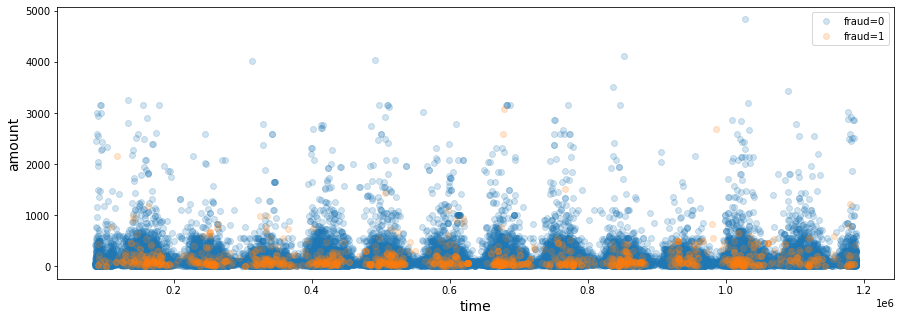

In [6]:
fig, axes = plt.subplots(figsize=(15, 5))
plt.scatter(train[train['isFraud'] == 0]['TransactionDT'], train[train['isFraud'] == 0]['TransactionAmt'], alpha=0.2, label='fraud=0')
plt.scatter(train[train['isFraud'] == 1]['TransactionDT'], train[train['isFraud'] == 1]['TransactionAmt'], alpha=0.2, label='fraud=1')
plt.legend()
plt.xlabel('time', fontdict={'size': 14})
plt.ylabel('amount', fontdict={'size':14});

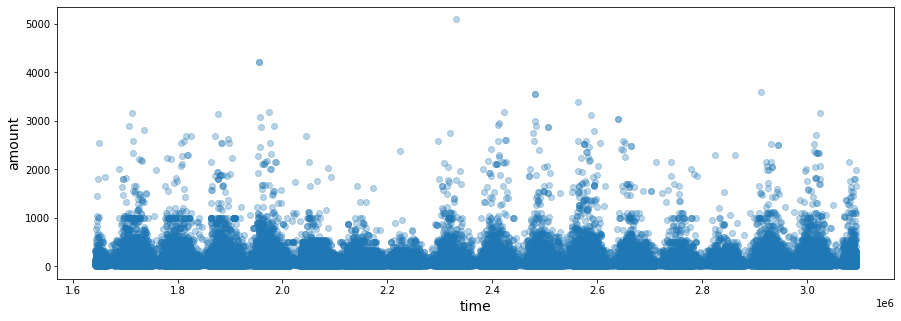

In [7]:
fig, axes = plt.subplots(figsize=(15, 5))
plt.scatter(test['TransactionDT'], test['TransactionAmt'], alpha=0.3)
plt.xlabel('time', fontdict={'size': 14})
plt.ylabel('amount', fontdict={'size':14});

__Выводы__  
Данные имеют явно выраженную сезонность (идут волнами), но тренда не прослеживается.  
Основная часть транзакций находится в пределах 1000.

Задание 3:  
построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.

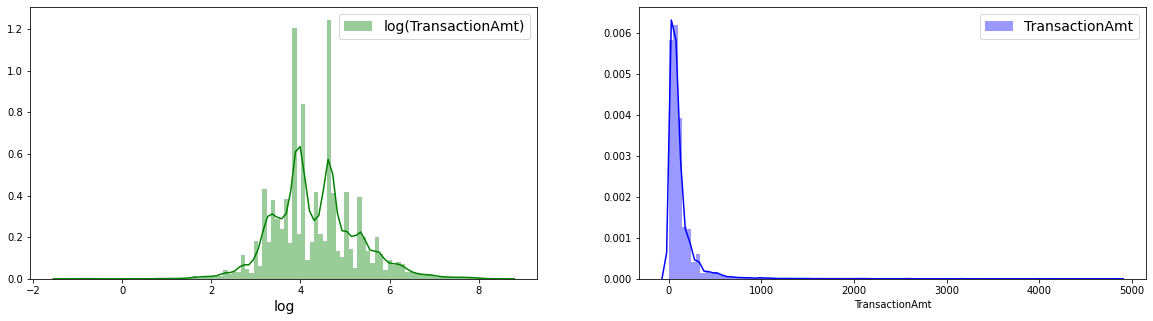

In [8]:
plt.subplots(1, 2, figsize=(20,5))
plt.subplot(121)
sns.distplot(np.log(train['TransactionAmt']), color="Green", label="log(TransactionAmt)", bins=100)
plt.xlabel("log", size=14)
plt.legend(loc="best", fontsize=14)

plt.subplot(122)
sns.distplot(train['TransactionAmt'], color="blue", label="TransactionAmt", bins=100)
plt.legend(loc="best", fontsize=14);

__Выводы__  
Распределние не является нормальным или логнормальным.  
Лограспределение мультимодальное

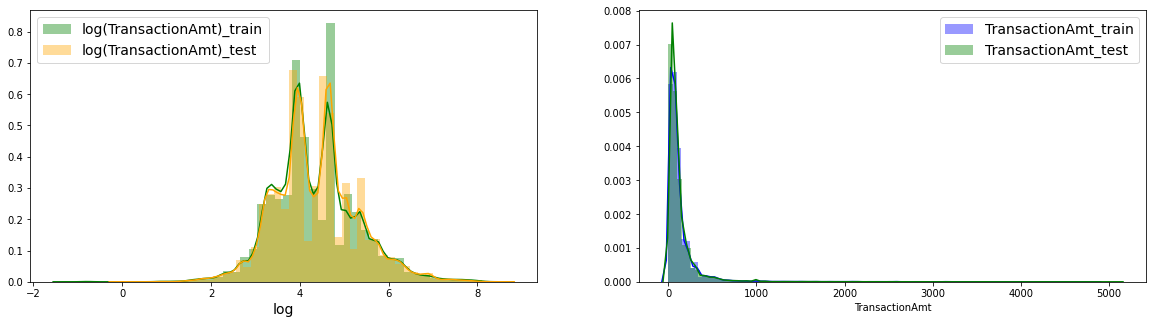

In [9]:
plt.subplots(1, 2, figsize=(20,5))
plt.subplot(121)
sns.distplot(np.log(train['TransactionAmt']), color="Green", label="log(TransactionAmt)_train", bins=50)
sns.distplot(np.log(test['TransactionAmt']), color="orange", label="log(TransactionAmt)_test", bins=50)
plt.xlabel("log", size=14)
plt.legend(loc="best", fontsize=14)

plt.subplot(122)
sns.distplot(train['TransactionAmt'], color="blue", label="TransactionAmt_train", bins=100)
sns.distplot(test['TransactionAmt'], color="green", label="TransactionAmt_test", bins=100)
plt.legend(loc="best", fontsize=14);

__Выводы__  
Рсапределение признака на train и test практически совпадают

Задание 4:  
построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы. 

In [10]:
encoder = LabelEncoder()

In [11]:
train['ProductCD_encoded'] = encoder.fit_transform(train['ProductCD'])

In [12]:
train['card4'].value_counts()

visa                32562
mastercard          15696
american express     1083
discover              654
Name: card4, dtype: int64

In [13]:
train['card4_encoded'] = train['card4'].map({'visa' : 0, 'mastercard' : 1, 'american express' : 2, 'discover' : 3})

In [14]:
train.head(2)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V332,V333,V334,V335,V336,V337,V338,V339,ProductCD_encoded,card4_encoded
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.0


In [15]:
train['card6'].value_counts()

debit              34206
credit             15786
debit or credit        3
charge card            3
Name: card6, dtype: int64

In [16]:
train['card6_encoded'] = train['card6'].map({'debit' : 0, 'credit' : 1, 'debit or credit' : 2, 'charge card' : 3})

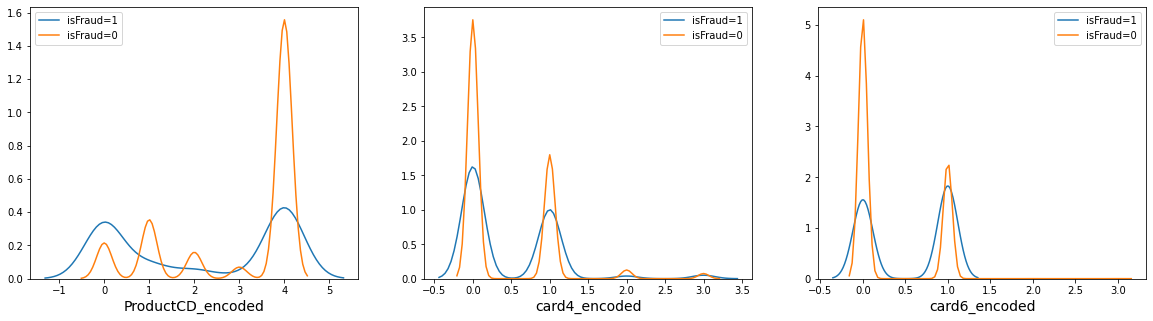

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
features = ['ProductCD_encoded', 'card4_encoded', 'card6_encoded']

for num, feature in enumerate(features):
    sns.kdeplot(train[train['isFraud'] == 1][feature].values, ax=axes[num%3],  label="isFraud=1")
    sns.kdeplot(train[train['isFraud'] == 0][feature].values, ax=axes[num%3],   label="isFraud=0")
    axes[num%3].set_xlabel(feature, fontsize=14)

__Выводы__  
Распредление ProductCD по целевой переменной не совпадает.  
Распределения по card4 и card6 зоть и не совпадают полностью, но очень близки.
Это говорит о том, что данные признаки обладают хорошей разделяющей способностью, то есть по ним объекты разных классов хорошо разбиваются.

## Основное задание:  
Даны выборки для обучения и для тестирования. Задание заключается в том, чтобы попробовать разные способы валидации, проанализировать плюсы / минусы каждой и сделать выводы о том, какой способ валидации наиболее устойчивый в данной задаче. Метрика качества для оценки прогнозов - ROC-AUC, название целевой переменной - IsFraud. Рекомендуется использовать модели градиетного бустинга, реализация любая. 

Подготовим датасет

In [18]:
# удалим столбцы, которые мы создали для отрисовки графиков
del train['ProductCD_encoded']
del train['card4_encoded']
del train['card6_encoded']

In [19]:
train_features = train.columns.drop(['isFraud', 'TransactionID', 'TransactionDT', 'R_emaildomain', 'M1', "M2", 'M3', 'M4', 'M5',
                                    'M6', 'M7', 'M8', 'M9'])

In [20]:
cat_features = train[train_features].select_dtypes(include=[np.object]).columns.values

In [21]:
cat_features = list(cat_features)

In [22]:
cat_features

['ProductCD', 'card4', 'card6', 'P_emaildomain']

In [23]:
train['card4'].fillna(train['card4'].value_counts().index[0], inplace=True)

In [24]:
test['card4'].fillna(train['card4'].value_counts().index[0], inplace=True)

In [25]:
train['card6'].fillna(train['card6'].value_counts().index[0], inplace=True)

In [26]:
test['card6'].fillna(train['card6'].value_counts().index[0], inplace=True)

In [27]:
train['P_emaildomain'].fillna(train['P_emaildomain'].value_counts().index[0], inplace=True)

In [28]:
test['P_emaildomain'].fillna(train['P_emaildomain'].value_counts().index[0], inplace=True)

`Задание 1:  
сделать Hold-Out валидацию с разбиением, размер которого будет адеквтаным, по вашему мнению; разбиение проводить по id-транзакции (TransactionID), обучать модель градиетного бустинга любой реализации с подбором числа деревьев по early_stopping критерию до достижения сходимости. Оценить качество модели на тестовой выборке, оценить расхождение по сравнению с качеством на обучающей выборке и тестовой выборке. `

Так как у нас заранее датасет разбит на тренировочную и тестовую выброку, то для Hold-Out валидации надо обучить модель на train и проверить качество на test

In [29]:
cat = catboost.CatBoostClassifier(random_state=77, learning_rate=0.1, iterations=500)

In [30]:
cat.fit(train[train_features], train['isFraud'], cat_features=cat_features, verbose=0, early_stopping_rounds=2)

In [31]:
print('ROC-AUC на тренировочной выборке = {}'.format(roc_auc_score(train['isFraud'], cat.predict(train[train_features]))))
print('ROC-AUC на тестовой выборке = {}'.format(roc_auc_score(test['isFraud'], cat.predict(test[train_features]))))

ROC-AUC на тренировочной выборке = 0.8109492668888435
ROC-AUC на тестовой выборке = 0.658151977702924


__Вывод__  
Налицо переобучение

`Задание 2:   
сделать Hold-Out валидацию с разбиением на 3 выборки, разбиение проводить по id-транзакции (TransactionID), размер каждой выборки подобрать самостоятельно. Повторить процедуру из п.1. `

Так как у нас данные распределены по времени, будет наверное правильным разбить test на valid и test по времени

In [32]:
df = pd.concat([train, test], axis=0)

In [33]:
df.sort_values(by=['TransactionDT'], inplace=True)

In [34]:
df.shape

(125001, 394)

In [35]:
int(df.shape[0] * 0.65)

81250

In [36]:
train = df[:int(df.shape[0] * 0.65)]
val = df[int(df.shape[0] * 0.65):int(df.shape[0] * 0.85)]
test = df[int(df.shape[0] * 0.85):]

In [37]:
cat.fit(train[train_features], train['isFraud'], cat_features=cat_features, verbose=0, early_stopping_rounds=2)

In [38]:
print('ROC-AUC на тренировочной выборке = {}'.format(roc_auc_score(train['isFraud'], cat.predict(train[train_features]))))
print('ROC-AUC на валидационной выборке = {}'.format(roc_auc_score(val['isFraud'], cat.predict(val[train_features]))))
print('ROC-AUC на тестовой выборке = {}'.format(roc_auc_score(test['isFraud'], cat.predict(test[train_features]))))

ROC-AUC на тренировочной выборке = 0.7847627712020412
ROC-AUC на валидационной выборке = 0.6416701236279364
ROC-AUC на тестовой выборке = 0.6886883241692826


__Выводы__  
После увеличения тренировочной выборки модель стала меньше переобучаться и показывает на валидационной и тренировочной выборке сопоставимые результаты

`Задание 3:  
построить доверительный интервал на данных из п.2 на основе бутстреп выборок, оценить качество модели на тестовом выборке относительно полученного доверительного интервала. Сделать выводы. `

Для bootstrap выборок объеденим train и val, выберем из них 1000 подвыборок для оценки доверительного инервала

In [39]:
df_to_bootstrap = pd.concat([train, val], axis=0)

In [40]:
df_to_bootstrap.head(2)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
def create_bootstrap_samples(data: np.array, n_samples: int = 1000) -> np.array:
    """
    Создание бутстреп-выборок.

    Parameters
    ----------
    data: np.array
        Исходная выборка, которая будет использоваться для
        создания бутстреп выборок.

    n_samples: int, optional, default = 1000
        Количество создаваемых бутстреп выборок.
        Опциональный параметр, по умолчанию, равен 1000.

    Returns
    -------
    bootstrap_idx: np.array
        Матрица индексов, для создания бутстреп выборок.

    """
    bootstrap_idx = np.random.randint(
        low=0, high=len(data), size=(n_samples, len(data))
    )
    return bootstrap_idx


def create_bootstrap_metrics(y_true: np.array,
                             y_pred: np.array,
                             metric: callable,
                             n_samlpes: int = 1000) -> List[float]:
    """
    Вычисление бутстреп оценок.

    Parameters
    ----------
    y_true: np.array
        Вектор целевой переменной.

    y_pred: np.array
        Вектор прогнозов.

    metric: callable
        Функция для вычисления метрики.
        Функция должна принимать 2 аргумента: y_true, y_pred.

    n_samples: int, optional, default = 1000
        Количество создаваемых бутстреп выборок.
        Опциональный параметр, по умолчанию, равен 1000.

    Returns
    -------
    bootstrap_metrics: List[float]
        Список со значениями метрики качества на каждой бустреп выборке.

    """
    scores = []

    if isinstance(y_true, pd.Series):
        y_true = y_true.values

    bootstrap_idx = create_bootstrap_samples(y_true)
    for idx in bootstrap_idx:
        y_true_bootstrap = y_true[idx]
        y_pred_bootstrap = y_pred[idx]

        score = metric(y_true_bootstrap, y_pred_bootstrap)
        scores.append(score)

    return scores


def calculate_confidence_interval(scores: list, conf_interval: float = 0.95) -> Tuple[float]:
    """
    Вычисление доверительного интервала.

    Parameters
    ----------
    scores: List[float / int]
        Список с оценками изучаемой величины.

    conf_interval: float, optional, default = 0.95
        Уровень доверия для построения интервала.
        Опциональный параметр, по умолчанию, равен 0.95.

    Returns
    -------
    conf_interval: Tuple[float]
        Кортеж с границами доверительного интервала.

    """
    left_bound = np.percentile(
        scores, ((1 - conf_interval) / 2) * 100
    )
    right_bound = np.percentile(
        scores, (conf_interval + ((1 - conf_interval) / 2)) * 100
    )

    return round(left_bound, 3), round(right_bound, 3)

In [42]:
cat.fit(df_to_bootstrap[train_features], df_to_bootstrap['isFraud'], cat_features=cat_features, verbose=0, early_stopping_rounds=2)

In [43]:
train_scores = create_bootstrap_metrics(train['isFraud'], cat.predict(train[train_features]), roc_auc_score)
test_scores = create_bootstrap_metrics(test['isFraud'], cat.predict(test[train_features]), roc_auc_score)

In [44]:
print('Доверительный интервал ROC-AUC для тренировочной выборки = {} '.format((calculate_confidence_interval(train_scores))))
print('Доверительный интервал ROC-AUC для тестовой выборки = {} '.format((calculate_confidence_interval(test_scores))))

Доверительный интервал для тренировочной выборки = (0.768, 0.79) 
Доверительный интервал для тестовой выборки = (0.693, 0.73) 


__Выводы__  
Как мы видим доверительнве интервалы не совпадают. О чем это может говорить? я честно говоря хз

`Задание 4:  
выполнить Adversarial Validation на основе данных из обучения / теста, подобрать объема из обучающей выборки, которые сильно похожи на объекты из тестовой выборки, и использовать их в качестве валидационного набора. Сделать выводы о полученных результатах. `

In [45]:
x_adv = pd.concat([
    df_to_bootstrap[train_features], test[train_features]], axis=0)
y_adv = np.hstack((np.zeros(df_to_bootstrap[train_features].shape[0]), np.ones(test[train_features].shape[0])))
assert x_adv.shape[0] == y_adv.shape[0]

In [46]:
x_adv.head()

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
cat_adv = catboost.CatBoostClassifier(random_state=77, learning_rate=0.1, iterations=100)

In [48]:
cat_adv.fit(x_adv[train_features], y_adv, cat_features=cat_features, verbose=0, early_stopping_rounds=2)

In [49]:
roc_auc_score(y_adv, cat_adv.predict(x_adv))

0.5343353634472827

получили нечто близкое к 0.5 - значит данные хорошие, можно их использовать

In [50]:
y_pred = cat_adv.predict_proba(x_adv[train_features])

In [51]:
pd.cut(
    y_pred[:, 1], bins=np.arange(0, 1.01, 0.1)
).value_counts().sort_index()

(0.0, 0.1]    45580
(0.1, 0.2]    36651
(0.2, 0.3]    39903
(0.3, 0.4]      900
(0.4, 0.5]      397
(0.5, 0.6]      248
(0.6, 0.7]      385
(0.7, 0.8]      354
(0.8, 0.9]      551
(0.9, 1.0]       32
dtype: int64

In [53]:
x_adv['adv_pred'] = y_pred[:, 1]

In [54]:
x_adv['adv_target'] = y_adv

In [55]:
x_adv.head(2)

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,...,V332,V333,V334,V335,V336,V337,V338,V339,adv_pred,adv_target
0,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.205237,0.0
1,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.184410,0.0


In [56]:
similar_data = x_adv[(x_adv['adv_target'] == 0) & (x_adv['adv_pred'] >= 0.7)]

In [57]:
similar_data.head(2)

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,...,V332,V333,V334,V335,V336,V337,V338,V339,adv_pred,adv_target
9309,77.00,W,15186,480.0,150.0,mastercard,224.0,debit,299.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.704640,0.0
18155,25.95,W,2581,199.0,150.0,mastercard,202.0,debit,436.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.792824,0.0


In [58]:
similar_data.shape

(87, 383)

Таким образом у нас в тренировочных данных 87 записей очень похожих на тестовые данные

`Задание 5:  
сделать KFold / StratifiedKFold валидацию (на ваше усмотрение), оценить получаемые качество и разброс по метрике качества. Сделать выводы об устойчивости кросс-валидации, сходимости оценки на кросс-валидации и отложенном наборе данных; `

In [59]:
train = df_to_bootstrap.copy().reset_index()

In [60]:
del train['index']

In [64]:
def make_cross_validation(X: pd.DataFrame,
                          y: pd.Series,
                          estimator: object,
                          cat_features: list,
                          metric: callable,
                          cv_strategy):
    """
    Кросс-валидация.

    Parameters
    ----------
    X: pd.DataFrame
        Матрица признаков.

    y: pd.Series
        Вектор целевой переменной.

    estimator: callable
        Объект модели для обучения.
        
    cat_features: list
        список категорийных признаков для catboost

    metric: callable
        Метрика для оценки качества решения.
        Ожидается, что на вход будет передана функция,
        которая принимает 2 аргумента: y_true, y_pred.

    cv_strategy: cross-validation generator
        Объект для описания стратегии кросс-валидации.
        Ожидается, что на вход будет передан объект типа
        KFold или StratifiedKFold.

    Returns
    -------
    oof_score: float
        Значение метрики качества на OOF-прогнозах.

    fold_train_scores: List[float]
        Значение метрики качества на каждом обучающем датасете кросс-валидации.

    fold_valid_scores: List[float]
        Значение метрики качества на каждом валидационном датасете кросс-валидации.

    oof_predictions: np.array
        Прогнозы на OOF.

    """
    estimators, fold_train_scores, fold_valid_scores = [], [], []
    oof_predictions = np.zeros(X.shape[0])

    for fold_number, (train_idx, valid_idx) in enumerate(cv_strategy.split(X, y)):
        x_train, x_valid = X.loc[train_idx], X.loc[valid_idx]
        y_train, y_valid = y.loc[train_idx], y.loc[valid_idx]

        estimator.fit(x_train, y_train, cat_features=cat_features)
        y_train_pred = estimator.predict(x_train)
        y_valid_pred = estimator.predict(x_valid)

        fold_train_scores.append(metric(y_train, y_train_pred))
        fold_valid_scores.append(metric(y_valid, y_valid_pred))
        oof_predictions[valid_idx] = y_valid_pred

        msg = (
            f"Fold: {fold_number+1}, train-observations = {len(train_idx)}, "
            f"valid-observations = {len(valid_idx)}\n"
            f"train-score = {round(fold_train_scores[fold_number], 4)}, "
            f"valid-score = {round(fold_valid_scores[fold_number], 4)}" 
        )
        print(msg)
        print("="*69)
        estimators.append(estimator)

    oof_score = metric(y, oof_predictions)
    print(f"CV-results train: {round(np.mean(fold_train_scores), 4)} +/- {round(np.std(fold_train_scores), 3)}")
    print(f"CV-results valid: {round(np.mean(fold_valid_scores), 4)} +/- {round(np.std(fold_valid_scores), 3)}")
    print(f"OOF-score = {round(oof_score, 4)}")

    return estimators, oof_score, fold_train_scores, fold_valid_scores, oof_predictions

In [116]:
cv_strategy = KFold(n_splits=5)

model = catboost.CatBoostClassifier(random_state=77, learning_rate=0.1, verbose=0)

estimators, oof_score, fold_train_scores, fold_valid_scores, oof_predictions = make_cross_validation(
    train[train_features], train["isFraud"], model, cat_features, metric=roc_auc_score, cv_strategy=cv_strategy
)

Fold: 1, train-observations = 85000, valid-observations = 21250
train-score = 0.8422, valid-score = 0.6305
Fold: 2, train-observations = 85000, valid-observations = 21250
train-score = 0.8346, valid-score = 0.6666
Fold: 3, train-observations = 85000, valid-observations = 21250
train-score = 0.8271, valid-score = 0.6655
Fold: 4, train-observations = 85000, valid-observations = 21250
train-score = 0.8348, valid-score = 0.6881
Fold: 5, train-observations = 85000, valid-observations = 21250
train-score = 0.8337, valid-score = 0.6636
CV-results train: 0.8345 +/- 0.005
CV-results valid: 0.6629 +/- 0.018
OOF-score = 0.6604


In [68]:
print('ROC-AUC на отложенной выборке = {:.4}'.format(roc_auc_score(test['isFraud'], model.predict(test[train_features]))))

ROC-AUC на отложенной выборке = 0.6973


__Выводы__  
Кроссвалидация в данном случае довольно устойчивая, так как нет сильного разброса в метриках на разнах фолдах и в приципе оценка на валидации близка к оценке на отложенной выборке

`Задание 6 * (опциональное):  
сделать Hold-Out валидацию по времени (TransactionDT), повторить процедуры из п.1 / п.2 (на ваш выбор). Построить доверительный интервал, сравнить качество на тестовой выборке с полученным доверительным интервалом. Сделать выводы. `

выше мы получили что  
Доверительный интервал для тренировочной выборки = (0.768, 0.79)   
Доверительный интервал для тестовой выборки = (0.693, 0.73)  
ROC-AUC на отложенной выборке = 0.6973
  
Как видно значение метрики на отложенной выборке попадает в доверительный интервал

`Задание 7 ** (совсем опциональное):   
в данном наборе данных у нас есть ID-транзакции (TransactionID) и время транзакции (TransactionDT), но отсутствует ID-клиента, который совершал транзакции. Кажется, что в этой задаче валидация по клиенту работала бы хорошо. Предложить критерий, по которому можно выделить клиентов и сделать п.5, используя созданное определение клиента, используя валидацию по клиенту (GroupKFold). `

In [104]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
for col in train.columns.values[3:]:
    if train[col].isnull().sum() == 0 and train[col].nunique() > 2000:
        print('В признаке {} уникальных значений {} из {}, в том числе {} уникальных с меткой 1 и {} с меткой 0'.format(
            col, 
            train[col].nunique(), 
            train.shape[0],
            train[train['isFraud'] == 1][col].nunique(), 
            train[train['isFraud'] == 0][col].nunique()
        ))

В признаке TransactionAmt уникальных значений 6493 из 106250, в том числе 616 уникальных с меткой 1 и 6371 с меткой 0
В признаке card1 уникальных значений 7887 из 106250, в том числе 470 уникальных с меткой 1 и 7846 с меткой 0
В признаке V126 уникальных значений 2586 из 106250, в том числе 447 уникальных с меткой 1 и 2369 с меткой 0
В признаке V127 уникальных значений 6599 из 106250, в том числе 734 уникальных с меткой 1 и 6280 с меткой 0
В признаке V128 уникальных значений 3886 из 106250, в том числе 614 уникальных с меткой 1 и 3612 с меткой 0
В признаке V130 уникальных значений 3773 из 106250, в том числе 242 уникальных с меткой 1 и 3732 с меткой 0
В признаке V133 уникальных значений 2508 из 106250, в том числе 470 уникальных с меткой 1 и 2237 с меткой 0
В признаке V134 уникальных значений 2002 из 106250, в том числе 410 уникальных с меткой 1 и 1783 с меткой 0
В признаке V314 уникальных значений 3229 из 106250, в том числе 221 уникальных с меткой 1 и 3156 с меткой 0
В признаке V315 у

Логично было бы предположить, что, если мы хотим выделить признак, характеризующий клиента, то это должен быть такой признак, который обладает достаточно большим количеством уникальных значений(не может же на 100+к записей быть 100 клиентов, хотя и может `¯\_(ツ)_/¯`, но мы будем предполагать что это все же данные от достаточно большого количества клиентов), и, в то же время, все значения не могут быть разными (тогда получится что у нас каждая запись пришла от уникального клиента).  
Исходя из этого предположения можно выделить несколько признаков: TransactionAmt, card1, V127  
`TransactionAmt` сразу выкидываем, так как это сумма, чисто теоретически может быть такое, что каждый клиент платит одну и ту же сумму, которая его однозначно идентифицирует, но это вряд ли.  
`V127` тоже выбросим, потому как в нём 73826 записей имеют значение 0  
Остается `card1`, возможно это какой-то идентификатор карты клиента, попробуем разбить по нему

In [110]:
def modified_make_cross_validation(X: pd.DataFrame,
                          y: pd.Series,
                          estimator: object,
                          cat_features: list,
                          metric: callable,
                          cv_strategy,
                          group=None):
    """
    Кросс-валидация.

    Parameters
    ----------
    X: pd.DataFrame
        Матрица признаков.

    y: pd.Series
        Вектор целевой переменной.

    estimator: callable
        Объект модели для обучения.
        
    cat_features: list
        список категорийных признаков для catboost

    metric: callable
        Метрика для оценки качества решения.
        Ожидается, что на вход будет передана функция,
        которая принимает 2 аргумента: y_true, y_pred.

    cv_strategy: cross-validation generator
        Объект для описания стратегии кросс-валидации.
        Ожидается, что на вход будет передан объект типа
        KFold или StratifiedKFold.
        
    group: string
        если в качестве стратегии передаётся GroupKFold, 
        то кроссвалидация будет происходить по этой группе,
        в результате которой в фолды будут попадать только непересекающиеся
        значения из группы

    Returns
    -------
    oof_score: float
        Значение метрики качества на OOF-прогнозах.

    fold_train_scores: List[float]
        Значение метрики качества на каждом обучающем датасете кросс-валидации.

    fold_valid_scores: List[float]
        Значение метрики качества на каждом валидационном датасете кросс-валидации.

    oof_predictions: np.array
        Прогнозы на OOF.

    """
    estimators, fold_train_scores, fold_valid_scores = [], [], []
    oof_predictions = np.zeros(X.shape[0])
    
    if cv_strategy == GKF:
        for fold_number, (train_idx, valid_idx) in enumerate(cv_strategy.split(X, y, X[group])):
            x_train, x_valid = X.loc[train_idx], X.loc[valid_idx]
            y_train, y_valid = y.loc[train_idx], y.loc[valid_idx]

            estimator.fit(x_train, y_train, cat_features=cat_features)
            y_train_pred = estimator.predict(x_train)
            y_valid_pred = estimator.predict(x_valid)

            fold_train_scores.append(metric(y_train, y_train_pred))
            fold_valid_scores.append(metric(y_valid, y_valid_pred))
            oof_predictions[valid_idx] = y_valid_pred

            msg = (
                f"Fold: {fold_number+1}, train-observations = {len(train_idx)}, "
                f"valid-observations = {len(valid_idx)}\n"
                f"train-score = {round(fold_train_scores[fold_number], 4)}, "
                f"valid-score = {round(fold_valid_scores[fold_number], 4)}" 
            )
            print(msg)
            print("="*69)
            estimators.append(estimator)
    
    else:
        for fold_number, (train_idx, valid_idx) in enumerate(cv_strategy.split(X, y)):
            x_train, x_valid = X.loc[train_idx], X.loc[valid_idx]
            y_train, y_valid = y.loc[train_idx], y.loc[valid_idx]

            estimator.fit(x_train, y_train, cat_features=cat_features)
            y_train_pred = estimator.predict(x_train)
            y_valid_pred = estimator.predict(x_valid)

            fold_train_scores.append(metric(y_train, y_train_pred))
            fold_valid_scores.append(metric(y_valid, y_valid_pred))
            oof_predictions[valid_idx] = y_valid_pred

            msg = (
                f"Fold: {fold_number+1}, train-observations = {len(train_idx)}, "
                f"valid-observations = {len(valid_idx)}\n"
                f"train-score = {round(fold_train_scores[fold_number], 4)}, "
                f"valid-score = {round(fold_valid_scores[fold_number], 4)}" 
            )
            print(msg)
            print("="*69)
            estimators.append(estimator)

    oof_score = metric(y, oof_predictions)
    print(f"CV-results train: {round(np.mean(fold_train_scores), 4)} +/- {round(np.std(fold_train_scores), 3)}")
    print(f"CV-results valid: {round(np.mean(fold_valid_scores), 4)} +/- {round(np.std(fold_valid_scores), 3)}")
    print(f"OOF-score = {round(oof_score, 4)}")

    return estimators, oof_score, fold_train_scores, fold_valid_scores, oof_predictions

In [114]:
GKF = GroupKFold(n_splits=5)

model = catboost.CatBoostClassifier(random_state=77, learning_rate=0.1, verbose=0)

estimators, oof_score, fold_train_scores, fold_valid_scores, oof_predictions = modified_make_cross_validation(
    train[train_features], train["isFraud"], model, cat_features, metric=roc_auc_score, cv_strategy=GKF, group='card1'
)

Fold: 1, train-observations = 85000, valid-observations = 21250
train-score = 0.8427, valid-score = 0.5898
Fold: 2, train-observations = 85000, valid-observations = 21250
train-score = 0.8344, valid-score = 0.6321
Fold: 3, train-observations = 85000, valid-observations = 21250
train-score = 0.8392, valid-score = 0.6101
Fold: 4, train-observations = 85000, valid-observations = 21250
train-score = 0.8316, valid-score = 0.6936
Fold: 5, train-observations = 85000, valid-observations = 21250
train-score = 0.8385, valid-score = 0.6382
CV-results train: 0.8373 +/- 0.004
CV-results valid: 0.6328 +/- 0.035
OOF-score = 0.6372


Это оказалось не лучшей идеей, кроссвалидация нейстойчивая получилась.

А если по сумме сделать?

In [115]:
estimators, oof_score, fold_train_scores, fold_valid_scores, oof_predictions = modified_make_cross_validation(
    train[train_features], train["isFraud"], model, cat_features, metric=roc_auc_score, cv_strategy=GKF, group='TransactionAmt'
)

Fold: 1, train-observations = 85000, valid-observations = 21250
train-score = 0.8261, valid-score = 0.7008
Fold: 2, train-observations = 85000, valid-observations = 21250
train-score = 0.8334, valid-score = 0.6885
Fold: 3, train-observations = 85000, valid-observations = 21250
train-score = 0.8266, valid-score = 0.7236
Fold: 4, train-observations = 85000, valid-observations = 21250
train-score = 0.8323, valid-score = 0.6888
Fold: 5, train-observations = 85000, valid-observations = 21250
train-score = 0.8333, valid-score = 0.6736
CV-results train: 0.8303 +/- 0.003
CV-results valid: 0.6951 +/- 0.017
OOF-score = 0.6953


А вот это уже получилось получше, даже лучше чем на просто KFold